In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [3]:
df=pd.read_csv("final_cleaned")

In [4]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Text,Time,Complaint,Sub-Complaint,clean_text,clean_list,complaint_id
0,1,1,1,Sr. Citizen discount fare in tatkal sewa from ...,2013-08-27 16:00:28,Reservation/Enquiry_Office Issues,Any Other Issues (Enquiry),sr citizen discount fare tatkal sewa jammu delhi,"['sr', 'citizen', 'discount', 'fare', 'tatkal'...",11
1,2,2,2,RATS ARE PRESENT IN COACH B1 OF TRAIN NUMBER 1...,2013-08-14 21:12:49,Maintenance / Cleanliness,Cockroaches,rat present coach train number ranakpur expres...,"['rat', 'present', 'coach', 'train', 'number',...",7
2,3,3,3,12003 coach e1 toilet no 3 leaking vinay pnr 2...,2013-08-27 18:31:57,Maintenance / Cleanliness,A/C & Electrical fittings- Loose,coach toilet leak vinay pnr,"['coach', 'toilet', 'leak', 'vinay', 'pnr']",7
3,7,7,7,Train no . 12321 pnr no 6122312493 complain _ ...,2013-08-27 20:22:41,Catering and Vending Services,Overcharging (Catering),train pnr complain pentry car meal prize rs.mi...,"['train', 'pnr', 'complain', 'pentry', 'car', ...",3
4,8,8,8,Train no . 12321 pnr no 6122312493 complain _ ...,2013-08-27 20:22:41,Catering and Vending Services,Overcharging (Catering),train pnr complain pentry car meal prize rs.mi...,"['train', 'pnr', 'complain', 'pentry', 'car', ...",3


In [88]:
df_holdout=pd.DataFrame()

In [6]:

for i in range(0,14):
    df_holdout=df_holdout.append(df.loc[df['complaint_id']==i][:7],ignore_index=True)
    df_holdout.head()
    df=df.drop(df.loc[df['complaint_id']==i][:5].index)
    
    print(i)


0
1
2
3
4
5
6
7
8
9
10
11
12
13


In [89]:
df_holdout.head()

""


In [90]:
r=list(np.random.randint(0,14,size=150))

for i in r:
    df_holdout=df_holdout.append(df.iloc[i],sort=True)

In [96]:
df_save=df_holdout

In [97]:
len(r)

150

In [8]:
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
import itertools, string, operator, re, unicodedata, nltk
from operator import itemgetter
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer, RegexpTokenizer
import nltk.tokenize
import numpy as np
from itertools import combinations
from gensim.models import Phrases
from collections import Counter


In [9]:
def word_freq(clean_text_list, top_n):
    """
    Word Frequency
    """
    flat = [item for sublist in clean_text_list for item in sublist]
    with_counts = Counter(flat)
    top = with_counts.most_common(top_n)
    word = [each[0] for each in top]
    num = [each[1] for each in top]
    return pd.DataFrame([word, num]).T

def word_freq_bigrams(clean_text_list, top_n):
    """
    Word Frequency With Bigrams
    """
    bigram_model = Phrases(clean_text_list, min_count=2, threshold=1)
    w_bigrams = list(bigram_model[clean_text_list])
    flat_w_bigrams = [item for sublist in w_bigrams for item in sublist]
    with_counts = Counter(flat_w_bigrams)
    top = with_counts.most_common(top_n)
    word = [each[0] for each in top]
    num = [each[1] for each in top]
    return pd.DataFrame([word, num]).T


def bigram_freq(clean_text_list, top_n):
    bigram_model = Phrases(clean_text_list, min_count=2, threshold=1)
    w_bigrams = list(bigram_model[clean_text_list])
    flat_w_bigrams = [item for sublist in w_bigrams for item in sublist]
    bigrams = []
    for each in flat_w_bigrams:
        if '_' in each:
            bigrams.append(each)
    counts = Counter(bigrams)
    top = counts.most_common(top_n)
    word = [each[0] for each in top]
    num = [each[1] for each in top]
    return pd.DataFrame([word, num]).T

In [10]:

##Top 20 most frequent words for all the articles
def reverse_str(text):
    return str(text).split(' ')
df['clean_list']=df['clean_text'].apply(reverse_str)
cl_text_list = df['clean_list'].tolist()
wf = word_freq(cl_text_list, 100)
wf.head(20)



,0,1
0,train,215323
1,coach,95779
2,pnr,94744
3,travel,41407
4,sir,41319
5,seat,40274
6,water,39540
7,work,36183
8,station,36133
9,toilet,33632


In [11]:
def change(list1):
    fullstr=""
    for list2 in list1:
        for word in list2:
            fullstr+=word
            fullstr+=" "
    return fullstr
cl_text_str=change(cl_text_list)

In [11]:
cl_text_str[:100]

'train pnr complain pentry car meal prize rs.mirinda cutlet plz register complain action thanks cost '

In [12]:
import collections
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from wordcloud import WordCloud,STOPWORDS

In [13]:
stopwords=STOPWORDS
wordclouds=WordCloud(stopwords=stopwords,background_color="white",max_words=1000,collocations = False).generate(cl_text_str)

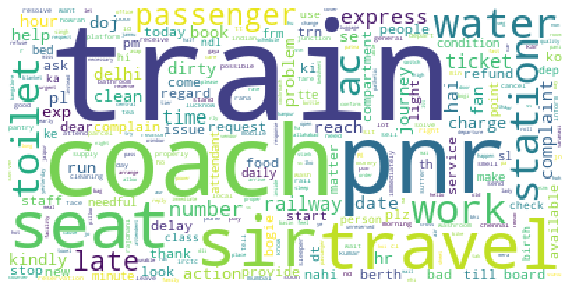

In [14]:
rcParams['figure.figsize'] = 10, 20
plt.imshow(wordclouds)
plt.axis("off")
plt.savefig('latest.jpeg')
plt.show()

In [16]:
def word_count(text):
    return len(str(text).split(' '))

In [17]:
df['word_count'] = df['Text'].apply(word_count)
avg_wc = df.groupby('Complaint').mean().reset_index()
avg_wc[['Complaint','word_count']]

,Complaint,word_count
0,Bedroll Complaints,34.679267
1,Booking of Luggage / Parcels / Goods,44.882837
2,Bribery and corruption,55.424173
3,Catering and Vending Services,40.428836
4,Emergency Assistance,33.813627
5,Feedback/Suggestions,42.841485
6,Improper behaviour of non railway/railway staff,55.286702
7,Maintenance / Cleanliness,28.856905
8,Malfunctioning of Electrical Equipment,25.293927
9,Non availability of Water Sub,23.947841


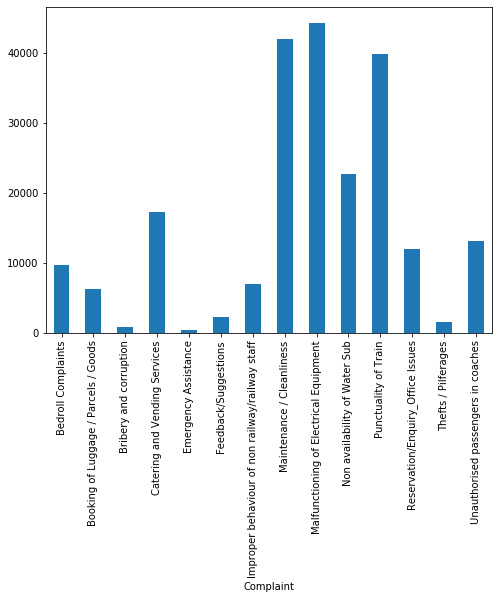

In [18]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8,6))
df.groupby('Complaint').Text.count().plot.bar(ylim=0)
plt.savefig('LatestBar.jpeg')

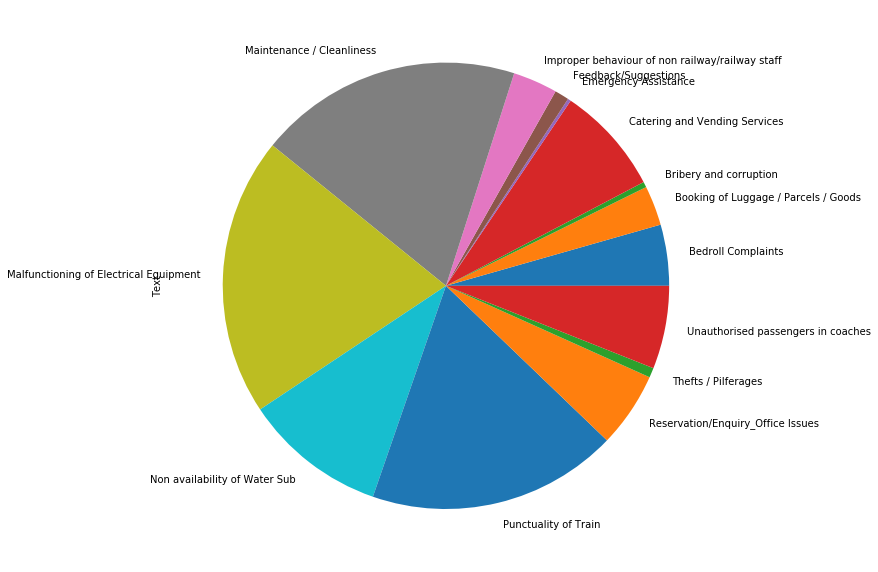

In [19]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,12))
df.groupby('Complaint').Text.count().plot.pie()
plt.savefig('pie.jpeg')

In [20]:
#top 20 words by category 
top_n=20
bigrams1=bigram_freq(cl_text_list,100)

In [21]:
bigrams1[:20]

,0,1
0,pnr_train,22935
1,train_number,11830
2,doj_--,9625
3,dear_sir,9106
4,coach_seat,8329
5,ac_work,7984
6,pnr_trn,7925
7,fan_work,6818
8,travel_train,6813
9,water_toilet,6273


In [31]:
print(3)

3


In [22]:
add_stop = ['', ' ', 'say', 's', 'u', 'ap', 'afp', '...', 'n', '\\','..']

stop_words = ENGLISH_STOP_WORDS.union(add_stop)

In [23]:
wordclouds2=WordCloud(stopwords=stop_words,background_color="white",max_words=1000,collocations = False).generate(" ".join(bigrams1[0]))

In [24]:
data_dict=bigrams1.set_index(0).to_dict()

In [25]:
wordclouds2.generate_from_frequencies(data_dict[1])

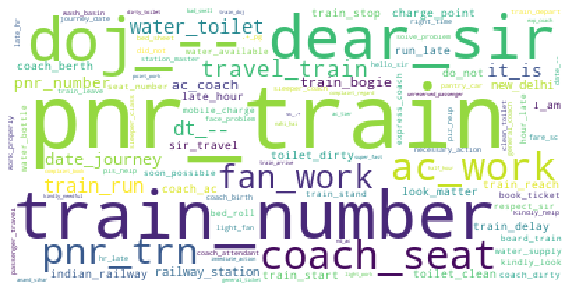

In [26]:
rcParams['figure.figsize'] = 10, 20
plt.imshow(wordclouds2)
plt.axis("off")
plt.savefig('Latest_bigram1.jpeg')
plt.show()


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(ngram_range=(1,2),min_df=2,max_df=0.95)
X=tfidf.fit_transform(df['clean_text'].astype('str'))

In [28]:
y=df['complaint_id']
print(X.shape,y.shape)

(219750, 395497) (219750,)


In [29]:

'''Features'''
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import label_binarize

In [30]:
#dimensionality reduction of 100 features
lsa=TruncatedSVD(n_components=100,n_iter=10,random_state=3)
X=lsa.fit_transform(X)
X.shape

(219750, 100)

In [ ]:
X_sm=X
y_sm=y

In [31]:
from imblearn.over_sampling import SMOTE
smote=SMOTE('not majority')
X_sm,y_sm=smote.fit_sample(X,y)

/home/anubhav/.local/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [32]:
print(X_sm.shape,y_sm.shape)

(620774, 100) (620774,)


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [34]:

'''Classifiers'''
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier

'''Metrics/Evaluation'''
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from scipy import interp
from itertools import cycle

'''Plotting'''
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.3,shuffle=True,stratify=y_sm,random_state=3)

In [36]:

model_dict={#'Dummy' : DummyClassifier(random_state=3),
             #'Stochastic Gradient Descent' : SGDClassifier(random_state=3, loss='log'),
              'Random Forest': RandomForestClassifier(random_state=3),
              #'Decsision Tree': DecisionTreeClassifier(random_state=3),
              #'AdaBoost': AdaBoostClassifier(random_state=3),
             # 'Gaussian Naive Bayes': GaussianNB(),
              #'K Nearest Neighbor': KNeighborsClassifier()
          }

In [37]:
#Function to get the scores for each model in a df
def model_score_df(model_dict):   
    model_name, ac_score_list, p_score_list, r_score_list, f1_score_list = [], [], [], [], []
    for k,v in model_dict.items():   
        model_name.append(k)
        v.fit(X_train, y_train)
        y_pred = v.predict(X_test)
        ac_score_list.append(accuracy_score(y_test, y_pred))
        p_score_list.append(precision_score(y_test, y_pred, average='macro'))
        r_score_list.append(recall_score(y_test, y_pred, average='macro'))
        f1_score_list.append(f1_score(y_test, y_pred, average='macro'))
        model_comparison_df = pd.DataFrame([model_name, ac_score_list, p_score_list, r_score_list, f1_score_list]).T
        model_comparison_df.columns = ['model_name', 'accuracy_score', 'precision_score', 'recall_score', 'f1_score']
        model_comparison_df = model_comparison_df.sort_values(by='f1_score', ascending=False)
    return model_comparison_df


In [38]:
model_score_df(model_dict)

/home/anubhav/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,model_name,accuracy_score,precision_score,recall_score,f1_score
0,Random Forest,0.903148,0.902305,0.903148,0.902173


In [39]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (40,30), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('con_mat_new.jpeg')
    return fig


Random Forest
                                                 precision    recall  f1-score   support

                             Bedroll Complaints       0.91      0.95      0.93     13302
           Booking of Luggage / Parcels / Goods       0.98      0.99      0.98     13302
                         Bribery and corruption       0.93      0.98      0.96     13302
                  Catering and Vending Services       0.92      0.92      0.92     13303
                           Emergency Assistance       0.95      1.00      0.97     13302
                           Feedback/Suggestions       0.89      0.95      0.92     13302
Improper behaviour of non railway/railway staff       0.81      0.83      0.82     13302
                      Maintenance / Cleanliness       0.79      0.73      0.76     13302
         Malfunctioning of Electrical Equipment       0.89      0.86      0.87     13303
                  Non availability of Water Sub       0.89      0.90      0.90     13303
      

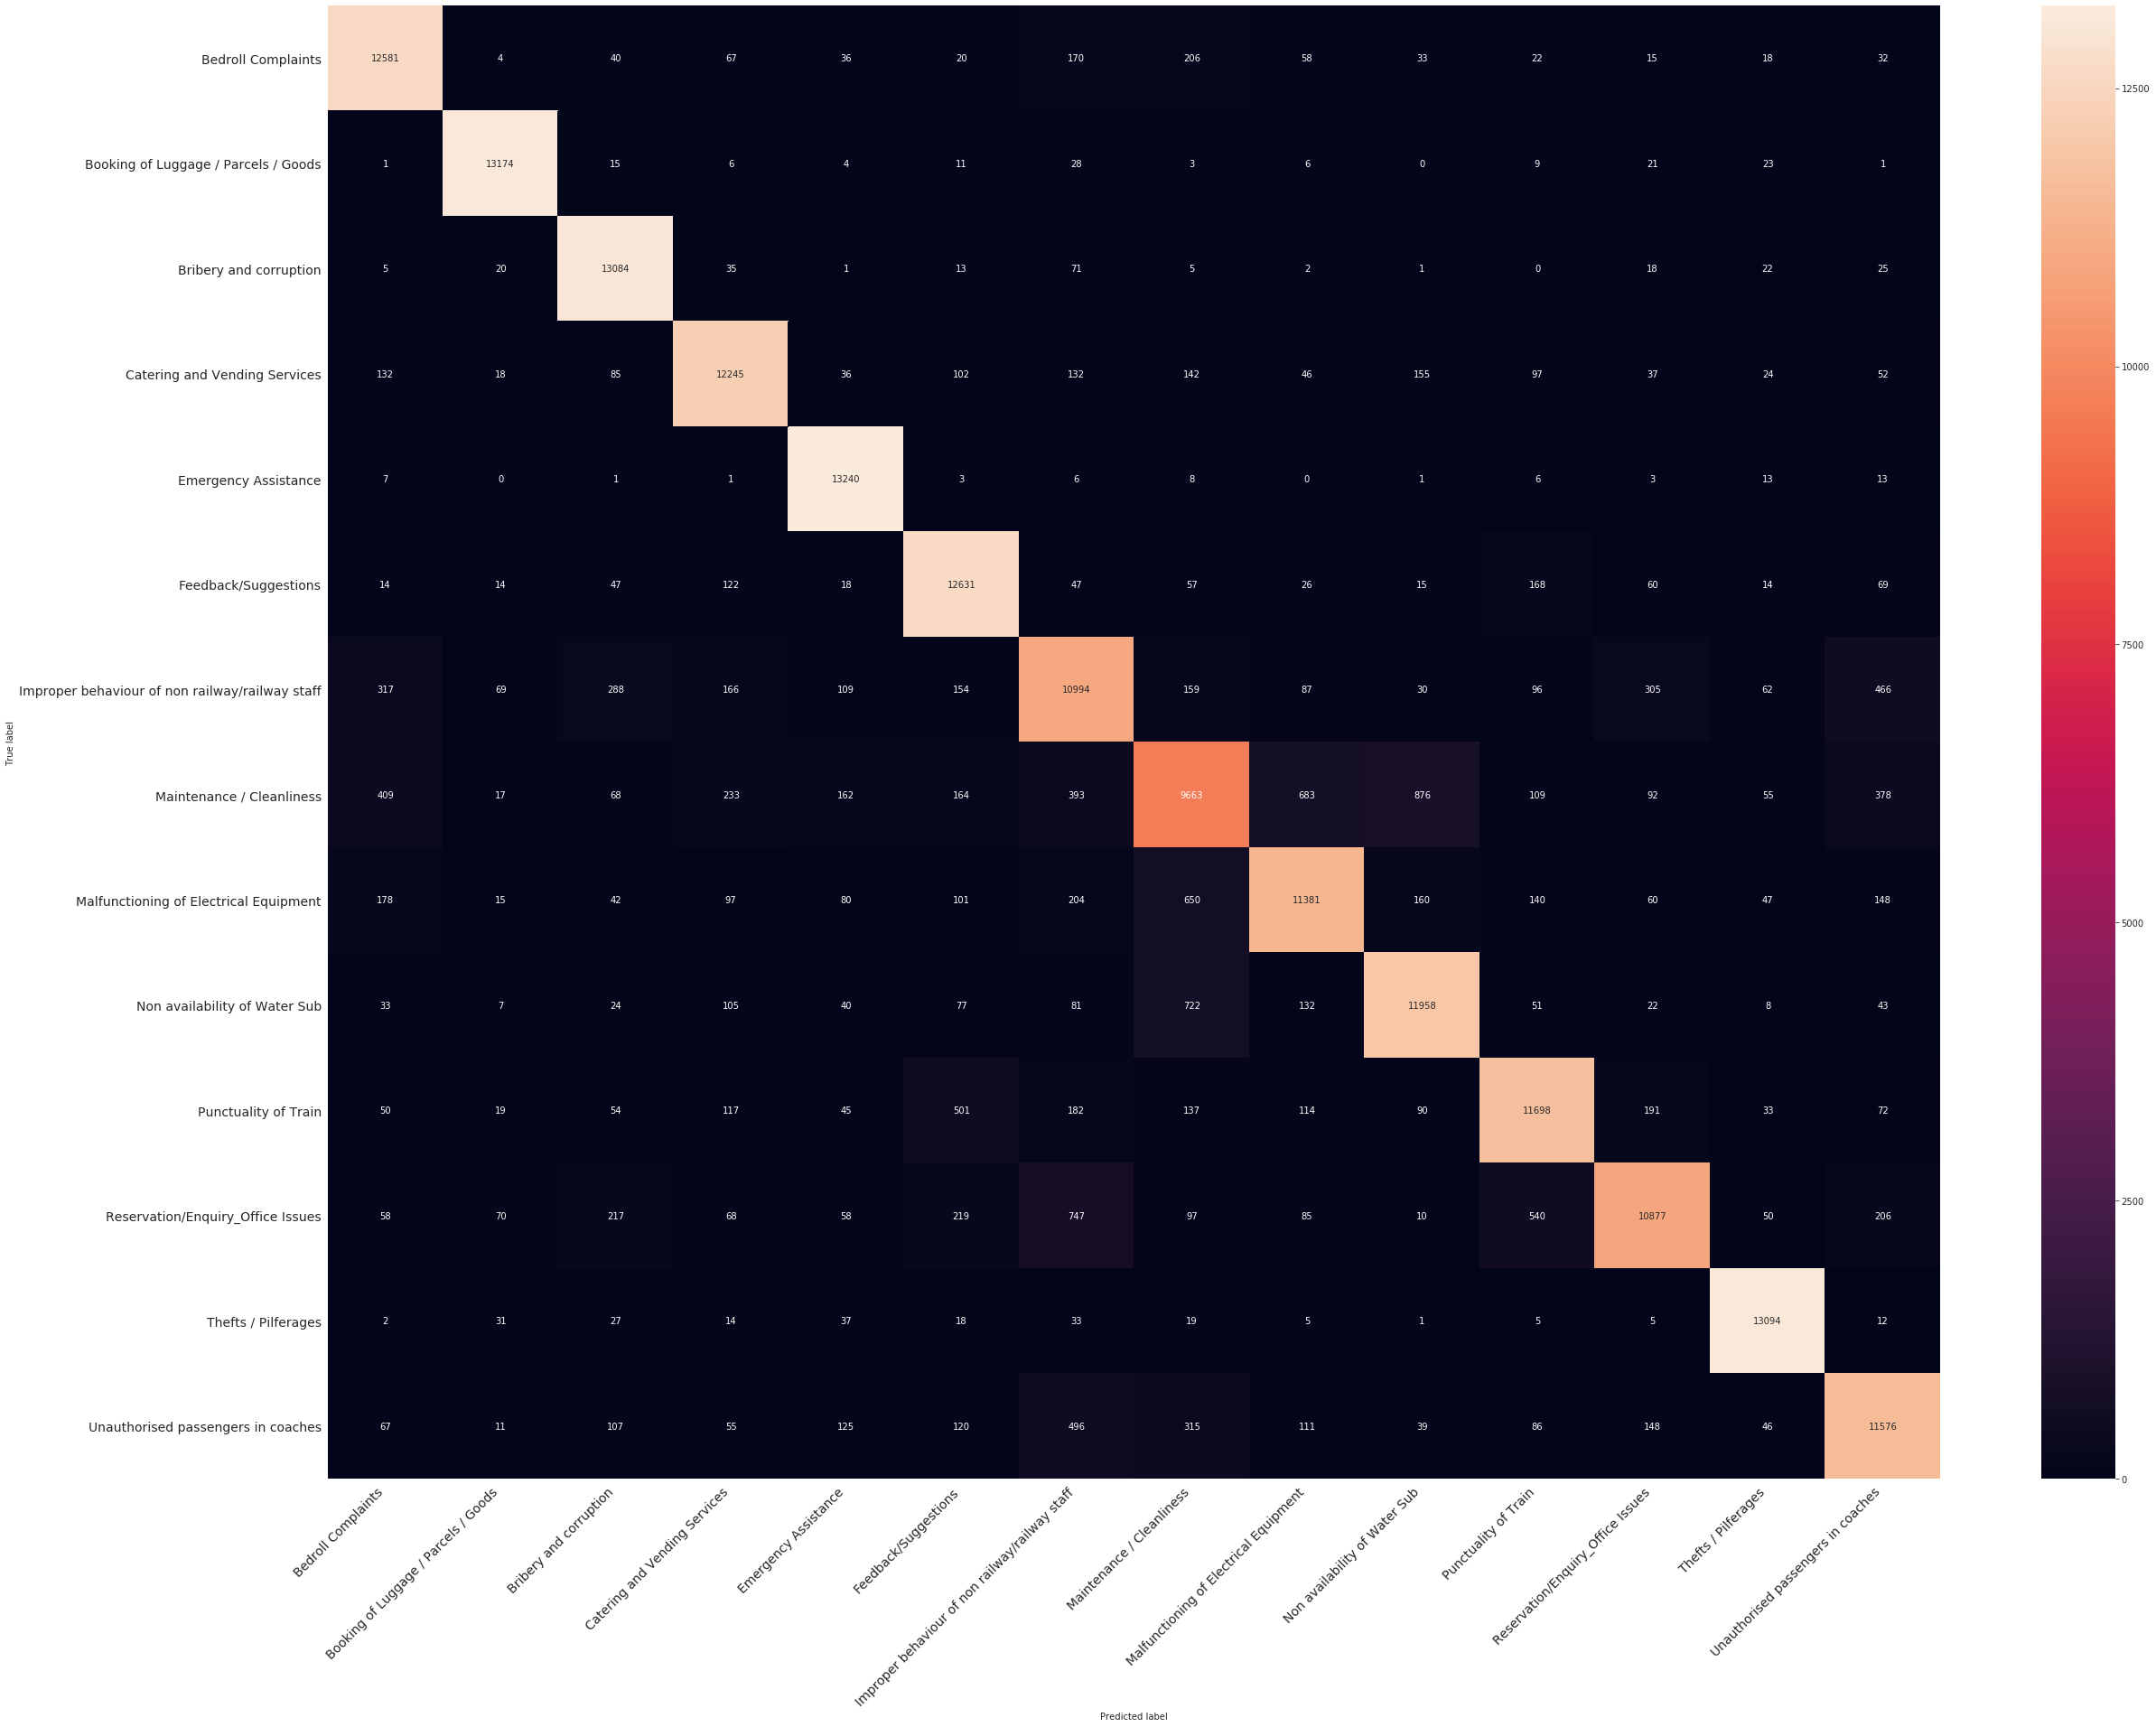

In [40]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

arr=np.unique(df.Complaint.values)
for k,v in model_dict.items():
    print(k)
    y_pred=v.predict(X_test)
    conf_mat=(confusion_matrix(y_test,y_pred))
    print_confusion_matrix(conf_mat,arr)
    print(classification_report(y_test, y_pred,target_names=arr))


In [ ]:


#Hyperparameter tuning
#Gridsearch with 5-fold cross validation
#Warning this can take a long time!!!

#RF
bootstrap = [True, False]
max_depth = [10, 50, 100,None]
max_features = ['auto', 'sqrt']
min_samples_leaf = [1, 2]
min_samples_split = [2, 5]
n_estimators = [800, 1400]
random_state = [3]

clf = RandomForestClassifier(class_weight='balanced')

params = dict(bootstrap = bootstrap,
              max_depth = max_depth,
              max_features = max_features,
              min_samples_leaf = min_samples_leaf,
              n_estimators = n_estimators,
              random_state=random_state)

gridsearch = GridSearchCV(clf,
                          params, 
                          cv=5,
                          verbose=1, 
                          n_jobs=-1)

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(clf.get_params())
#rf_best_model = gridsearch.fit(X, y)



In [41]:


#Plot AUC - SGD

#Binarize the labels
y_b = label_binarize(y, classes = [i for i in range(0,14)])
n_classes = y_b.shape[1]

#Shuffle and split training and test sets with stratified sampling and binarized labels
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X,
                                                            y_b,
                                                            test_size = .3,
                                                            shuffle = True,
                                                            stratify = y,
                                                            random_state = 3)

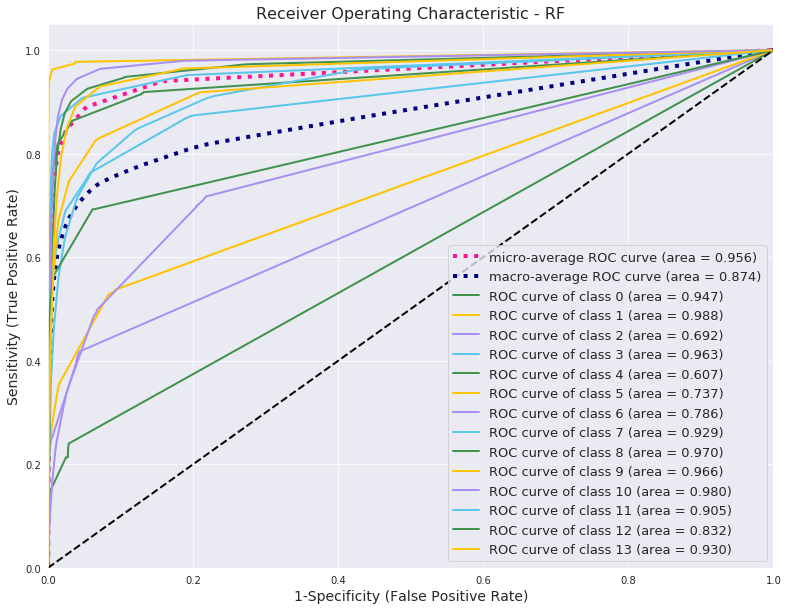

In [42]:
#Plot AUC - RF

#Learn to predict each class against the other
rf_classifier = OneVsRestClassifier(model_dict['Random Forest'])

y_score = rf_classifier.fit(X_train_b, y_train_b).predict_proba(X_test_b)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_b[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#Compute micro-average ROC curve and ROC area
fpr['micro'], tpr['micro'], _ = roc_curve(y_test_b.ravel(), y_score.ravel())
roc_auc['micro'] = auc(fpr['micro'], tpr['micro'])

#First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

#Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

#Finally average it and compute AUC
mean_tpr /= n_classes

fpr['macro'] = all_fpr
tpr['macro'] = mean_tpr
roc_auc['macro'] = auc(fpr['macro'], tpr['macro'])

#Plot all ROC curves
plt.figure(figsize=(13,10)) 
sns.set_style('darkgrid')
lw=2

plt.plot(fpr['micro'], 
         tpr['micro'], 
         label='micro-average ROC curve (area = {0:0.3f})'''.format(roc_auc['micro']),
         color='deeppink',
         linestyle=':', 
         linewidth=4)

plt.plot(fpr['macro'], 
         tpr['macro'], 
         label='macro-average ROC curve (area = {0:0.3f})'''.format(roc_auc['macro']),
         color='navy', 
         linestyle=':', 
         linewidth=4)

colors = cycle(['#41924F', '#FFC300', '#a98ff3', '#59C7EA'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], 
             color=color, 
             lw=lw, 
             label='ROC curve of class {0} (area = {1:0.3f})'''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity (False Positive Rate)', fontsize = 14)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize = 14)
plt.title('Receiver Operating Characteristic - RF', fontsize = 16)
plt.legend(loc="lower right", fontsize = 13)
plt.show()

In [ ]:
plt.save_img

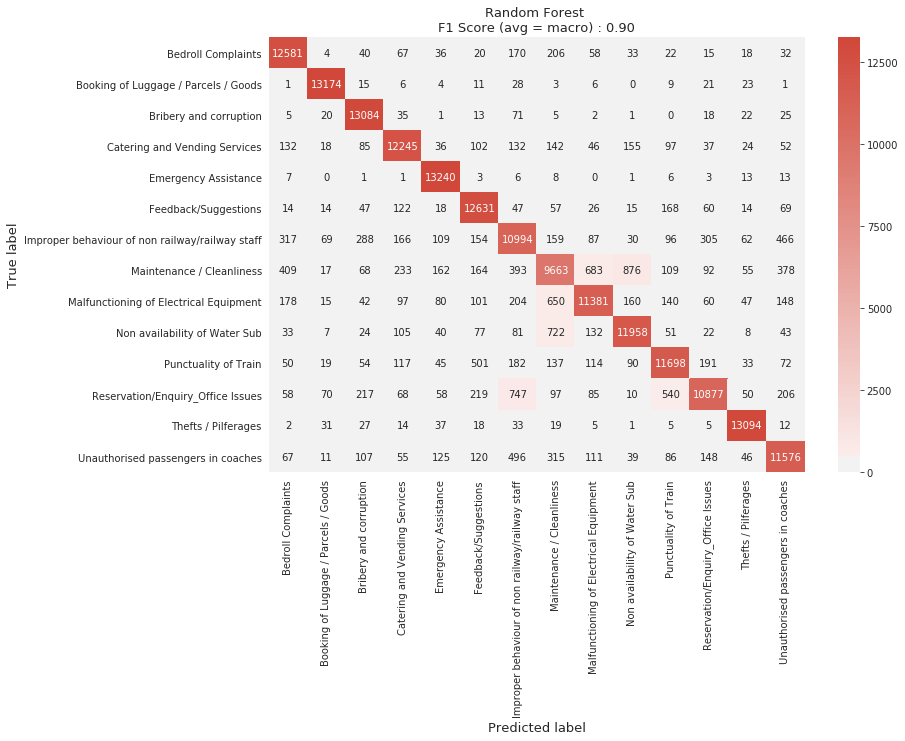

In [43]:
#Confusion Matrix - RF

#Fit the training data
model_dict['Random Forest'].fit(X_train, y_train)

#Predict the testing data
y_pred = model_dict['Random Forest'].predict(X_test)

#Get the confusion matrix and put it into a df
cm = confusion_matrix(y_test, y_pred) 

cm_df = pd.DataFrame(cm,
                     index = list(arr), 
                     columns = list(arr))

#Plot the heatmap
plt.figure(figsize=(12, 8))

sns.heatmap(cm_df, 
            center=0, 
            cmap=sns.diverging_palette(220, 15, as_cmap=True), 
            annot=True, 
            fmt='g')

plt.title('Random Forest \nF1 Score (avg = macro) : {0:.2f}'.format(f1_score(y_test, y_pred, average='macro')), fontsize = 13)
plt.ylabel('True label', fontsize = 13)
plt.xlabel('Predicted label', fontsize = 13)
plt.show()

In [44]:
com_dict=dict([(v,k) for k,v in dict(enumerate(arr)).items()])

In [98]:
df_holdout.shape

(150, 11)

In [99]:
lsa1=TruncatedSVD(n_components=100,n_iter=10,random_state=3)

In [100]:
#Putting it all together to make predictions on the unseen text

#Get the text of the 5 articles we held out from each of the categories in the beginning
unseen = df_holdout['clean_text'].astype('str') 

#Use the saved models to transform the unseen text with tf-idf and lsa
tfidf=TfidfVectorizer(ngram_range=(1,2),min_df=2,max_df=0.95)
X_unseen_tfidf=tfidf.fit_transform(unseen)

X_unseen = lsa.fit_transform(X_unseen_tfidf)


In [101]:
print(X_unseen.shape)

(150, 100)


In [102]:
#Putting it all together to make predictions on the unseen text

#Get the text of the 5 articles we held out from each of the categories in the beginning
unseen = df_holdout['clean_text'].astype('str') 

#Use the saved models to transform the unseen text with tf-idf and lsa
tfidf=TfidfVectorizer(ngram_range=(1,2),min_df=2,max_df=0.95)
X_unseen_tfidf=tfidf.fit_transform(unseen)
X_unseen = lsa1.fit_transform(X_unseen_tfidf)

#Fit the models with the best params on the full data
model_dict['Random Forest'].fit(X, y)
#model_dict['Random Forest'].fit(X, y)

#Make the prediction on the unseen articles with the fitted best models and put it into a df alongside the correct labels
#df_holdout['pred_sgd'] = model_dict['Random Forest'].predict(X_unseen)
df_holdout['pred_rf'] = model_dict['Random Forest'].predict(X_unseen)

label_num_dict = com_dict

df_holdout['correct'] = df_holdout['Complaint'].map(label_num_dict)
df_holdout = df_holdout.drop('clean_text', 1)
df_holdout_new = df_holdout[['Text', 'Complaint', 'pred_rf', 'correct']]

df_holdout_new

,Text,Complaint,pred_rf,correct
15,Train no . 12321 pnr no 6122312493 complain _ ...,Catering and Vending Services,9,3
30,"PNR:8216145548,TRAIN:11077,DOJ:29-08-2013,TIME...",Maintenance / Cleanliness,8,7
38,EMU 64097 IS TODAY AGAIN LATE,Punctuality of Train,7,10
31,Train no 544411 RE-MUT passenger is a suburban...,Punctuality of Train,7,10
41,Sir aaj train no.54471 train sakauti tanda sta...,Punctuality of Train,7,10
37,"Its the station of anbala cantt, platform no. ...",Catering and Vending Services,7,3
31,Train no 544411 RE-MUT passenger is a suburban...,Punctuality of Train,7,10
26,64034 EMU today (29/Oct) again late but it dep...,Punctuality of Train,7,10
41,Sir aaj train no.54471 train sakauti tanda sta...,Punctuality of Train,7,10
29,"PNR:8216145548,TRAIN:11077,DOJ:29-08-2013,TIME...",Maintenance / Cleanliness,8,7
